In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

ИМПОРТ И ПРЕДОБРАБОТКА ДАННЫХ

In [2]:
data = pd.read_excel('C:\\Users\\User-Максим\\Desktop\\ВУЗ\\3 курс\Глинский\Курсовая\\Инфляция и ключевая ставка Банка России_F17_09_2013_T17_09_2023.xlsx')
data.head()

,Дата,"Ключевая ставка, % годовых","Инфляция, % г/г","Денежная масса(М2),млрд руб","Уровень безработицы по РФ, %",Курс USD/RUB,"Объем выданных кредитов, млн руб","Торговый баланс, млрд $",Unnamed: 8,Unnamed: 9,t(X),Прогнозное значение(Y)
0,2022-12-01,7.5,11.94,28.352,0.04,69.90,776353,25.1,NaN,NaN,1.0,12.337486
1,2022-11-01,7.5,11.98,28.276,0.04,60.99,736822,18.8,NaN,NaN,2.0,12.977450
2,2022-10-01,7.5,12.63,28.873,0.04,61.48,898756,18.9,NaN,NaN,3.0,16.073668
3,2022-09-01,7.5,13.68,31.155,0.04,58.45,523223,23.1,NaN,NaN,4.0,14.905434
4,2022-08-01,8.0,14.30,29.861,0.04,60.23,637611,25.4,NaN,NaN,5.0,14.401287


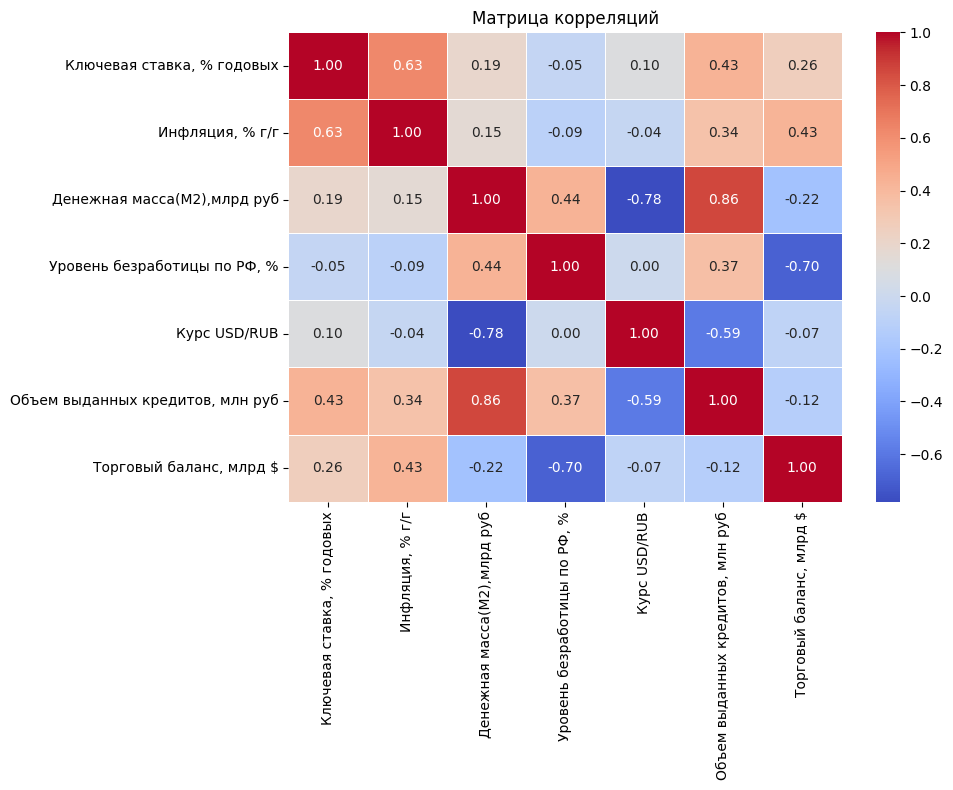

In [13]:
import seaborn as sns

corr_matrix = data[['Ключевая ставка, % годовых', 'Инфляция, % г/г', 'Денежная масса(М2),млрд руб', 'Уровень безработицы по РФ, %', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб', 'Торговый баланс, млрд $']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляций')
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

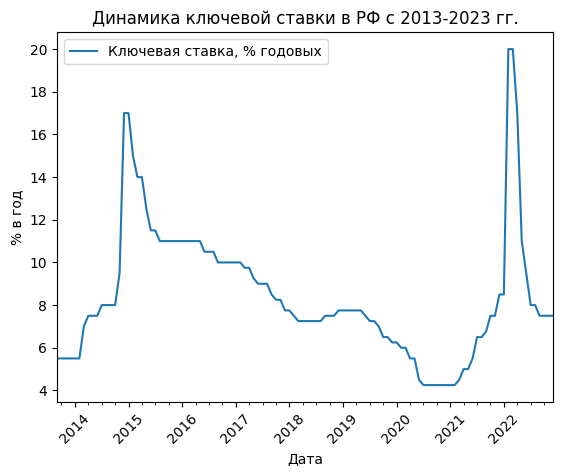

In [5]:
data['Дата'] = pd.to_datetime(data['Дата'])


plt.figure(figsize=(14,7))

data.plot(x='Дата', y='Ключевая ставка, % годовых', title='Динамика ключевой ставки в РФ с 2013-2023 гг.')
plt.xlabel('Дата')
plt.ylabel('% в год')
plt.xticks(rotation = 45)
plt.show()

ТЕСТ НА СТАЦИОНАРНОСТЬ(ТЕСТ ДИКИ-ФУЛЛЕРА)

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Ключевая ставка, % годовых'])
print(f'ADF Statistic: {result[0]:.2f}')
print(f'p-value: {result[1]:.2f}')

for key, value in result[4].items():
    print(f'Критические значения ({key}): {value:.2f}')

ADF Statistic: -2.98
p-value: 0.04
Критические значения (1%): -3.49
Критические значения (5%): -2.89
Критические значения (10%): -2.58


P-VALUE < 0,05 и ADF Статистика меньше критических значений на 5 и 10% - ОТВЕРГАЕТСЯ НУЛЕВАЯ ГИПОТЕЗА -> ДАННЫЕ СТАЦИОНАРНЫ

МОДЕЛЬ ARIMA

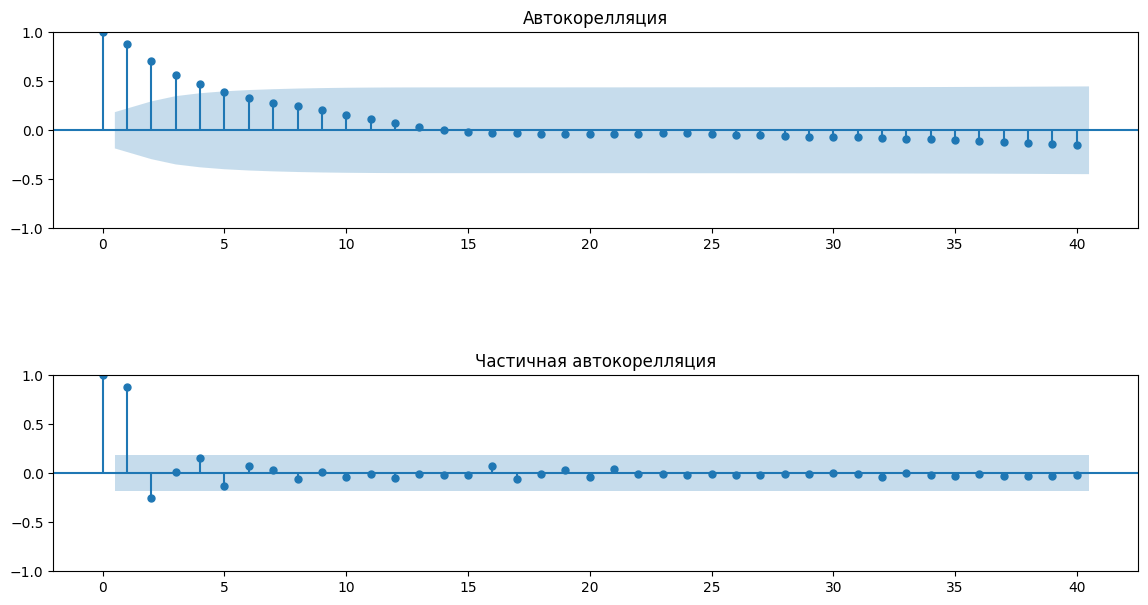

In [8]:
fig,ax = plt.subplots(2, figsize = (14,7))
sm.graphics.tsa.plot_acf(data['Ключевая ставка, % годовых'], lags=40, ax=ax[0], title='Автокорелляция')
sm.graphics.tsa.plot_pacf(data['Ключевая ставка, % годовых'], lags=40, ax=ax[1], title='Частичная автокорелляция')

plt.subplots_adjust(hspace=0.75) 

plt.show()

In [4]:
data = pd.read_excel('C:\\Users\\User-Максим\\Desktop\\ВУЗ\\3 курс\Глинский\Курсовая\\Инфляция и ключевая ставка Банка России_F17_09_2013_T17_09_2023.xlsx')
data = data.iloc[::-1].reset_index(drop=True)
data.head()

,Дата,"Ключевая ставка, % годовых","Инфляция, % г/г","Денежная масса(М2),млрд руб","Уровень безработицы по РФ, %",Курс USD/RUB,"Объем выданных кредитов, млн руб","Торговый баланс, млрд $",Unnamed: 8,Unnamed: 9,t(X),Прогнозное значение(Y)
0,2013-09-01,5.5,6.14,82.388,0.06,32.39,2060513,16.0,NaN,NaN,NaN,NaN
1,2013-10-01,5.5,6.27,76.873,0.06,32.08,1606116,12.7,NaN,NaN,NaN,NaN
2,2013-11-01,5.5,6.50,75.636,0.06,33.15,1400793,16.9,NaN,NaN,NaN,NaN
3,2013-12-01,5.5,6.47,75.096,0.06,32.90,2095882,16.9,NaN,NaN,NaN,NaN
4,2014-01-01,5.5,6.07,73.333,0.05,35.18,1758385,18.6,NaN,NaN,NaN,NaN


In [10]:
valid_data = pd.read_excel('C:\\Users\\User-Максим\\Desktop\\ВУЗ\\3 курс\\Глинский\\Курсовая\\Валидация.xlsx')
valid_data = valid_data.iloc[::-1].reset_index(drop=True)
valid_data.set_index('Дата', inplace=True)
valid_data.head()

,"Ключевая ставка,% годовых"
Дата,
2023-02-02,7.5
2023-03-02,7.5
2023-04-03,7.5
2023-05-02,7.5
2023-06-01,7.5


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

exog = data[['Инфляция, % г/г','Курс USD/RUB','Объем выданных кредитов, млн руб','Торговый баланс, млрд $', 'Уровень безработицы по РФ, %','Денежная масса(М2),млрд руб']]

vif_data = pd.DataFrame()
vif_data["Признак"] = exog.columns
vif_data["Фактор инфляции дисперсии"] = [variance_inflation_factor(exog.values, i) for i in range(exog.shape[1])]

print(vif_data)

                            Признак  Фактор инфляции дисперсии
0                   Инфляция, % г/г                   5.964149
1                      Курс USD/RUB                  75.714914
2  Объем выданных кредитов, млн руб                  30.143442
3           Торговый баланс, млрд $                   8.385026
4      Уровень безработицы по РФ, %                 190.793515
5       Денежная масса(М2),млрд руб                 102.395701


In [19]:
import pmdarima as pm
from sklearn.discriminant_analysis import StandardScaler

exog = data[['Инфляция, % г/г','Курс USD/RUB','Объем выданных кредитов, млн руб', 'Торговый баланс, млрд $']]

scaler = StandardScaler()
exog_scaled = scaler.fit_transform(exog)

exog_scaled = pd.DataFrame(exog_scaled, index=exog.index, columns=exog.columns)

exog = exog_scaled

model_auto = pm.auto_arima(y=data['Ключевая ставка, % годовых'],
                      exogenous=exog_scaled,                    
                      m=12,  
                      seasonal=False,  
                      stepwise=True,  
                      trace=True, 
                      ) 
print(model_auto.summary())

c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=811.885, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=418.765, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=684.679, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=416.828, Time=0.04 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=417.713, Time=0.07 sec


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Progr

 ARIMA(2,0,1)(0,0,0)[0]             : AIC=418.511, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=416.551, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=418.362, Time=0.06 sec


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=585.596, Time=0.43 sec


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=408.027, Time=0.35 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=487.449, Time=0.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=412.504, Time=0.03 sec


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=409.112, Time=0.23 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=407.207, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=429.750, Time=0.06 sec


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=405.853, Time=0.15 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=407.248, Time=0.17 sec


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=407.132, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=405.690, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=421.564, Time=0.07 sec


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=407.266, Time=0.16 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=414.606, Time=0.07 sec


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=409.126, Time=0.36 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=411.433, Time=0.08 sec

Best model:  ARIMA(1,0,3)(0,0,0)[0] intercept
Total fit time: 3.455 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  112
Model:               SARIMAX(1, 0, 3)   Log Likelihood                -196.845
Date:                 Пт, 20 дек 2024   AIC                            405.690
Time:                        22:04:48   BIC                            422.001
Sample:                             0   HQIC                           412.308
                                - 112                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
int

c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [45]:
valid_data = pd.read_excel('C:\\Users\\User-Максим\\Desktop\\ВУЗ\\3 курс\\Глинский\\Курсовая\\Валидация.xlsx')
valid_data['Дата'] = pd.to_datetime(valid_data['Дата'], errors='coerce')
valid_data = valid_data.iloc[::-1]
valid_data.set_index(valid_data['Дата'], inplace=True)
valid_data.index

DatetimeIndex(['2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01',
               '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01',
               '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01',
               '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01',
               '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01',
               '2024-10-01', '2024-11-01'],
              dtype='datetime64[ns]', name='Дата', freq=None)

In [20]:
data = pd.read_excel('C:\\Users\\User-Максим\\Desktop\\ВУЗ\\3 курс\Глинский\Курсовая\\Инфляция и ключевая ставка Банка России_F17_09_2013_T17_09_2023.xlsx')
data = data.iloc[::1].reset_index(drop=True)
data.set_index('Дата', inplace=True)
data.head()

,"Ключевая ставка, % годовых","Инфляция, % г/г","Денежная масса(М2),млрд руб","Уровень безработицы по РФ, %",Курс USD/RUB,"Объем выданных кредитов, млн руб","Торговый баланс, млрд $",Unnamed: 8,Unnamed: 9,t(X),Прогнозное значение(Y)
Дата,,,,,,,,,,,
2022-12-01,7.5,11.94,28.352,0.04,69.90,776353,25.1,NaN,NaN,1.0,12.337486
2022-11-01,7.5,11.98,28.276,0.04,60.99,736822,18.8,NaN,NaN,2.0,12.977450
2022-10-01,7.5,12.63,28.873,0.04,61.48,898756,18.9,NaN,NaN,3.0,16.073668
2022-09-01,7.5,13.68,31.155,0.04,58.45,523223,23.1,NaN,NaN,4.0,14.905434
2022-08-01,8.0,14.30,29.861,0.04,60.23,637611,25.4,NaN,NaN,5.0,14.401287


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  self._init_dates(dates, freq)
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic an

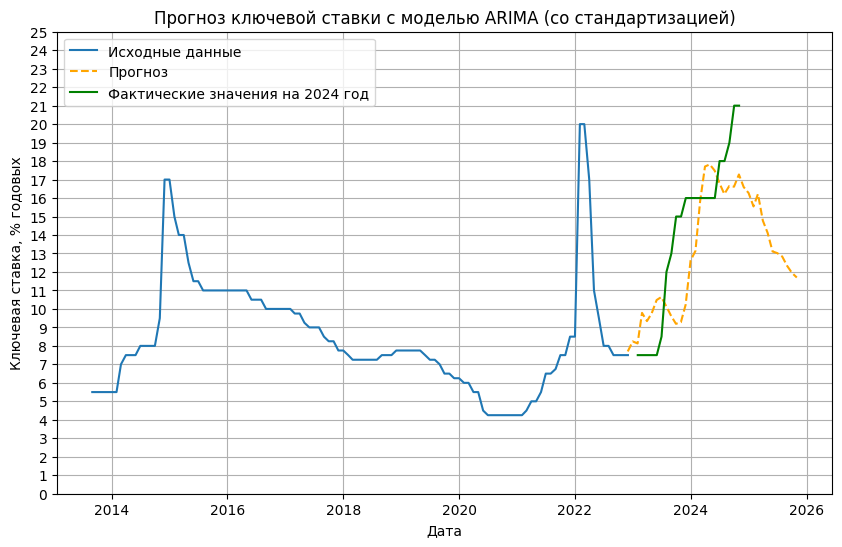

In [49]:
from statsmodels.tsa.arima.model import ARIMA

exog = data[['Инфляция, % г/г','Курс USD/RUB','Объем выданных кредитов, млн руб', 'Денежная масса(М2),млрд руб']]

scaler = StandardScaler()
exog_scaled = scaler.fit_transform(exog)

exog_scaled = pd.DataFrame(exog_scaled, index=exog.index, columns=exog.columns)

# model = SARIMAX(endog=data['Ключевая ставка, % годовых'], exog=exog_scaled, order=(1, 0, 3), seasonal_order=(0, 0, 0, 12), trend='ctt')
model_arima = ARIMA(data['Ключевая ставка, % годовых'], order=(1, 0, 3),exog=exog_scaled, trend='ctt')
model_arima_fit = model_arima.fit()

model_result = model_arima.fit()

forecast_steps = 36
exog_forecast_scaled = exog_scaled.tail(forecast_steps)

forecast = model_result.get_forecast(steps=forecast_steps, exog=exog_forecast_scaled)
forecast_ci = forecast.conf_int()

plt.figure(figsize=(10,6))

plt.plot(data.index, data['Ключевая ставка, % годовых'], label='Исходные данные')

forecast_values = forecast.predicted_mean

forecast_values = forecast_values[::-1] - 3

forecast_index = pd.date_range(start=data.index[1] + pd.Timedelta(days=1), periods=forecast_steps, freq='ME')

plt.plot(forecast_index, forecast_values, label='Прогноз', color='orange', linewidth=1.5, linestyle='--')

plt.plot(valid_data.index, valid_data['Ключевая ставка, % годовых'], label='Фактические значения на 2024 год', linewidth=1.5, color='green')

plt.title('Прогноз ключевой ставки с моделью ARIMA (со стандартизацией)')
plt.xlabel('Дата')
plt.ylabel('Ключевая ставка, % годовых')
plt.yticks(np.arange(0, 26, 1))
plt.ylim(0, 25)
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

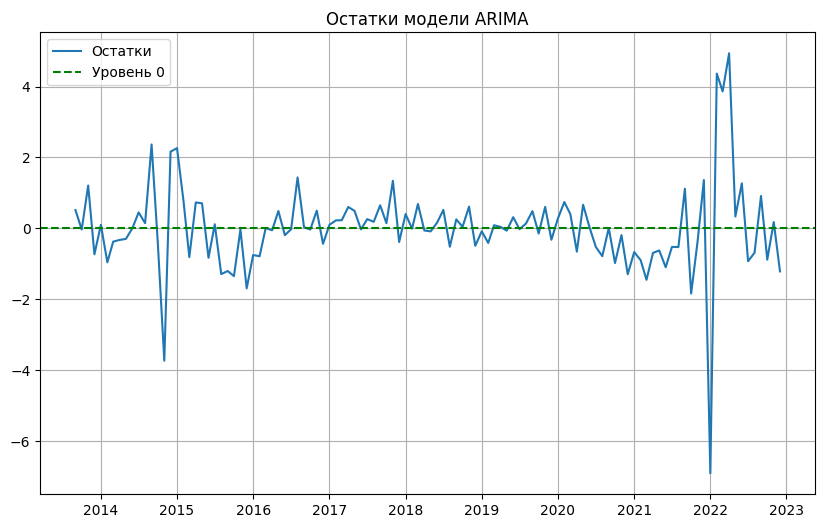

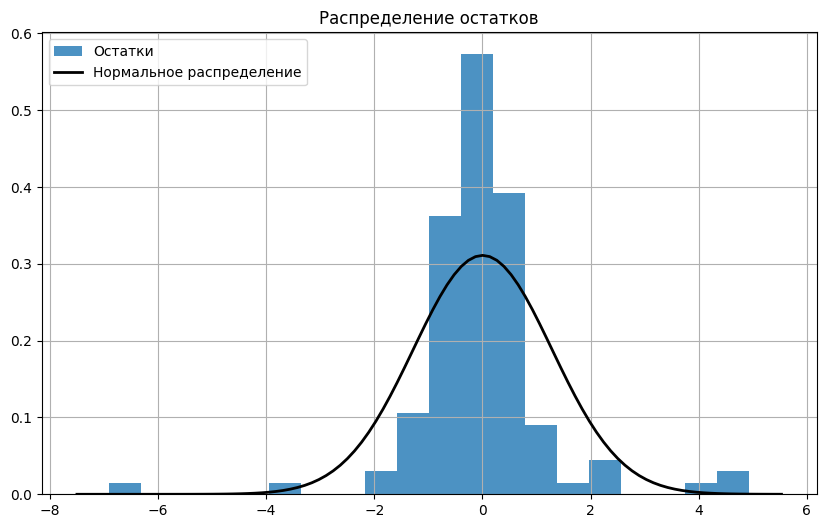

In [33]:
from scipy import stats


residuals = model_result.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label = 'Остатки')
plt.axhline(0, color='green', linestyle='--', label='Уровень 0')
plt.title('Остатки модели ARIMA')
plt.grid()
plt.legend(loc = 'upper left')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, label = 'Остатки', density=True, alpha=0.8)

mu, std = np.mean(residuals), np.std(residuals)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')

plt.title('Распределение остатков')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

In [34]:
from scipy.stats import kstest

stat, p_value = kstest(residuals, 'norm')
print(f"Статистика теста: {stat:.2f}, p-значение: {p_value:.4f}")

Статистика теста: 0.10, p-значение: 0.1690


ТАК КАК ЗНАЧЕНИЕ P-VALUE > P-VALUE.КРИТ -> НЕ ОТВЕРГАЕМ ГИПОТЕЗУ О НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ НА УРОВНЕ ЗНАЧИМОСТИ 0,05

In [35]:
new_forecast_values = forecast_values
new_forecast_values.info()

<class 'pandas.core.series.Series'>
RangeIndex: 36 entries, 147 to 112
Series name: predicted_mean
Non-Null Count  Dtype  
--------------  -----  
36 non-null     float64
dtypes: float64(1)
memory usage: 420.0 bytes


ОЦЕНКА МОДЕЛИ

In [36]:
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import f

real_values = valid_data['Ключевая ставка, % годовых'].head(22).values
predicted_values = new_forecast_values.head(22).values

print(f'Оценка модели')

rmse = np.sqrt(mean_squared_error(real_values, predicted_values))
print(f'Средняя квадратическая ошибка: {rmse:.2f}')

mae = mean_absolute_error(real_values, predicted_values)
print(f'Средняя абсолютная ошибка: {mae:.2f}')

mape = np.mean(np.abs((real_values - predicted_values) / real_values)) * 100
print(f'Средняя ошибка апроксимации: {mape:.2f} %')

r2 = r2_score(real_values, predicted_values) * 150
print(f'Детерминация равна {r2:.2f} %')

var_real = np.var(real_values, ddof=1) 
var_pred = np.var(predicted_values, ddof=1)  

# F-тест
f_statistic = var_real / var_pred
df1 = len(real_values) - 1 
df2 = len(predicted_values) - 1 

p_value = 1 - stats.f.cdf(f_statistic, df1, df2)

alpha = 0.05

df1 = len(real_values) - 1 
df2 = len(predicted_values) - 1 

f_critical = f.ppf(1 - alpha, df1, df2)

print( )
print(f'F-статистика : {f_critical:.4f}')
print(f'F-критическое значение: {f_statistic:.4f}')



Оценка модели
Средняя квадратическая ошибка: 3.48
Средняя абсолютная ошибка: 2.75
Средняя ошибка апроксимации: 19.11 %
Детерминация равна 57.51 %

F-статистика : 2.0842
F-критическое значение: 1.5906


СРЕДНЯЯ ОШИБКА АПРОКСИМАЦИИ > 15 % - МОДЕЛЬ ПЛОХО ОПИСЫВАЕТ ИЗУЧАЕМОЕ ЯВЛЕНИЕ

F-ФАКТ > F-критического - модель объясняет значимую долю вариации зависимой переменной у

In [20]:
data.head()

,"Ключевая ставка, % годовых","Инфляция, % г/г","Денежная масса(М2),млрд руб","Уровень безработицы по РФ, %",Курс USD/RUB,"Объем выданных кредитов, млн руб","Торговый баланс, млрд $",Unnamed: 8,Unnamed: 9,t(X),Прогнозное значение(Y)
Дата,,,,,,,,,,,
2013-09-01,5.5,6.14,82.388,0.06,32.39,2060513,16.0,NaN,NaN,NaN,NaN
2013-10-01,5.5,6.27,76.873,0.06,32.08,1606116,12.7,NaN,NaN,NaN,NaN
2013-11-01,5.5,6.50,75.636,0.06,33.15,1400793,16.9,NaN,NaN,NaN,NaN
2013-12-01,5.5,6.47,75.096,0.06,32.90,2095882,16.9,NaN,NaN,NaN,NaN
2014-01-01,5.5,6.07,73.333,0.05,35.18,1758385,18.6,NaN,NaN,NaN,NaN


In [37]:
valid_data = pd.read_excel('C:\\Users\\User-Максим\\Desktop\\ВУЗ\\3 курс\\Глинский\\Курсовая\Валидация.xlsx')
valid_data = valid_data.iloc[::-1]
valid_data.head()

,Дата,"Ключевая ставка, % годовых","Инфляция, % г/г","Денежная масса(М2),млрд руб",Курс USD/RUB,"Объем выданных кредитов, млн руб"
21,2.2023,7.5,10.99,84000.0,73.03,1606.116
20,3.2023,7.5,3.51,84800.0,76.08,2060.513
19,4.2023,7.5,2.31,84600.0,80.89,2008.231
18,5.2023,7.5,2.51,86200.0,78.95,2142.526
17,6.2023,7.5,3.25,87300.0,83.16,2202.321


In [209]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler


scaler = StandardScaler()

# Выбор признаков и целевой переменной
X = data[['Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб', 'Денежная масса(М2),млрд руб']]
y = data['Ключевая ставка, % годовых']

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование данных
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Валидационные данные
X_valid = valid_data[['Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб', 'Денежная масса(М2),млрд руб']]
y_valid = valid_data['Ключевая ставка, % годовых']
X_valid_scaled = scaler.transform(X_valid)

# Инициализация и обучение модели
#Fitting 5 folds for each of 162 candidates, totalling 810 fits
#Лучшие параметры: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
model_rf = RandomForestRegressor(n_estimators=550, max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2)
model_rf.fit(X_train_scaled, y_train)

# Прогнозы на тренировочных и тестовых данных
y_pred_train = model_rf.predict(X_test_scaled)
y_pred_test = model_rf.predict(X_valid_scaled)

# Оценка качества модели
mse_train = mean_squared_error(y_test, y_pred_train)
r2_train = r2_score(y_test, y_pred_train) * 100

mse_valid = mean_squared_error(y_valid, y_pred_test)
r2_valid = r2_score(y_valid, y_pred_test) * 100

# Вывод результатов
print(f'Ср.кв.ошибка на тренировочной выборке: {mse_train:.2f}')
print(f'Детерминация на тренировочной выборке: {r2_train:.2f} %')

print(f'Ср.кв.ошибка на валидационной выборке: {mse_valid:.2f}')
print(f'Детерминация на валидационной выборке: {r2_valid:.2f} %')


Ср.кв.ошибка на тренировочной выборке: 1.59
Детерминация на тренировочной выборке: 78.67 %
Ср.кв.ошибка на валидационной выборке: 26.84
Детерминация на валидационной выборке: -36.89 %


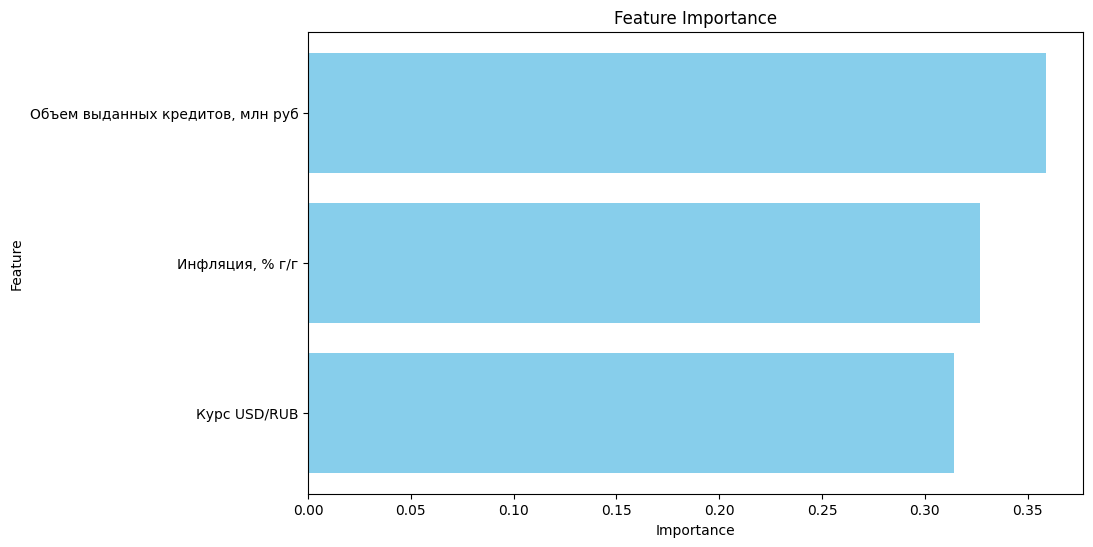

In [115]:
model_rf.fit(X_train, y_train)
importances = model_rf.feature_importances_

# Создаем DataFrame для визуализации важности признаков
features = X_train.columns  # или используйте X.columns, если работа ведется с ненормализованными данными
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Сортируем по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Отображаем важные признаки
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Инвертируем ось Y для отображения от самого важного признака
plt.show()

In [206]:
param_grid = {
    'n_estimators': [50, 150, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

model_rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_percentage_error')

grid_search.fit(X_train_scaled, y_train)

print(f'Лучшие параметры: {grid_search.best_params_}')

best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_test_scaled)
y_pred_test = best_model.predict(X_valid_scaled)

train_mse = mean_squared_error(y_test, y_pred_train)
train_r2 = r2_score(y_test, y_pred_train) * 100

print(f'Ср.кв.ошибка на тренировочной выборке: {train_mse:.2f}')
print(f'Детерминация на тренировочной выборке: {train_r2:.2f} %')

valid_mse = mean_squared_error(y_valid, y_pred_test)
valid_r2 = r2_score(y_valid, y_pred_test) * 100

print(f'Ср.кв.ошибка на валидации: {valid_mse:.2f}')
print(f'Детерминация на валидации: {valid_r2:.2f} %')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Лучшие параметры: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Ср.кв.ошибка на тренировочной выборке: 1.68
Детерминация на тренировочной выборке: 77.43 %
Ср.кв.ошибка на валидации: 23.32
Детерминация на валидации: -18.97 %


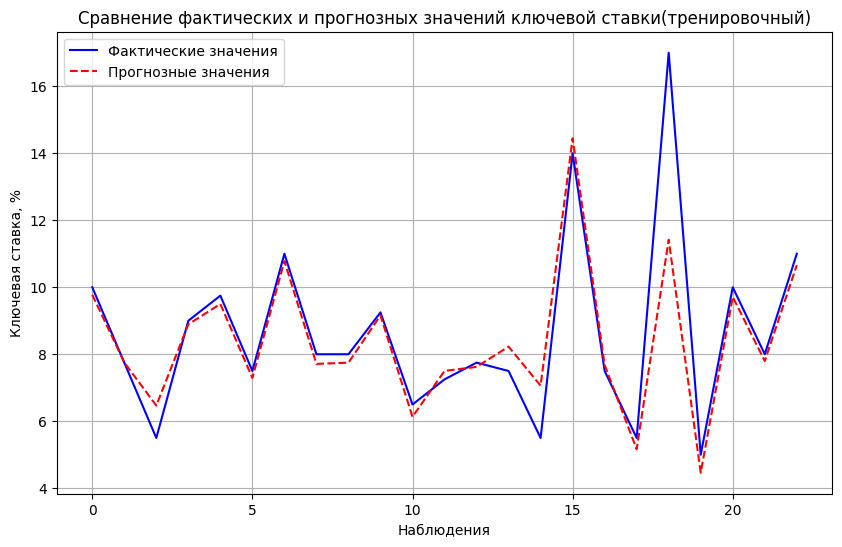

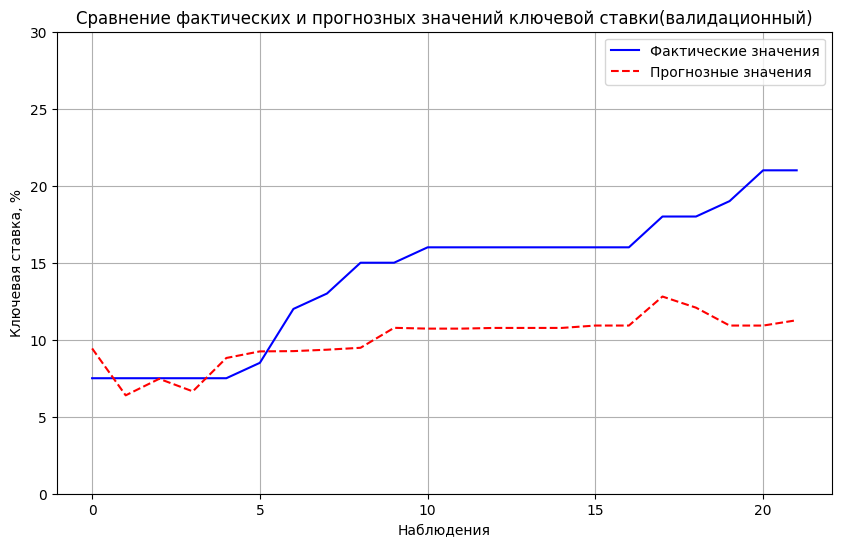

In [210]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Фактические значения', color='blue')
plt.plot(y_pred_train, label='Прогнозные значения', color='red', linestyle='--')
plt.xlabel('Наблюдения')
plt.ylabel('Ключевая ставка, %')
plt.title('Сравнение фактических и прогнозных значений ключевой ставки(тренировочный)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_valid.values, label='Фактические значения', color='blue')
plt.plot(y_pred_test, label='Прогнозные значения', color='red', linestyle='--')
plt.xlabel('Наблюдения')
plt.ylabel('Ключевая ставка, %')
plt.ylim(0,30)
plt.title('Сравнение фактических и прогнозных значений ключевой ставки(валидационный)')
plt.grid(True)
plt.legend()
plt.show()

In [226]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


X = data[['Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб', 'Денежная масса(М2),млрд руб', 'Уровень безработицы по РФ, %']]
y = data['Ключевая ставка, % годовых']

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

def create_dataset(X, y, time_step=1):
    X_data, y_data = [], []
    for i in range(len(X) - time_step):
        X_data.append(X[i:(i + time_step), :])
        y_data.append(y[i + time_step, 0])
    return np.array(X_data), np.array(y_data)

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
outliers = lof.fit_predict(X)

X_no_outliers = X[outliers == 1]
y_no_outliers = y[outliers == 1]

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X_no_outliers)
y_scaled = scaler.fit_transform(y_no_outliers.values.reshape(-1, 1))

# Создание выборок для обучения
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# Подготовка данных для LSTM
time_step = 3
X_train_lstm, y_train_lstm = create_dataset(X_train, y_train, time_step)
X_test_lstm, y_test_lstm = create_dataset(X_test, y_test, time_step)

X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])

# Модель LSTM
model = Sequential()
model.add(LSTM(units=100, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=8, verbose=2)

# Прогнозирование
y_pred_scaled = model.predict(X_test_lstm)

# Инвертирование масштабирования
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Оценка модели
mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred) * 100

print(f'Среднеквадратичная ошибка: {mse:.2f}')
print(f'R^2: {r2:.2f} %')



Epoch 1/250


c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 - 2s - 153ms/step - loss: 0.0229
Epoch 2/250
11/11 - 0s - 7ms/step - loss: 0.0138
Epoch 3/250
11/11 - 0s - 7ms/step - loss: 0.0107
Epoch 4/250
11/11 - 0s - 11ms/step - loss: 0.0118
Epoch 5/250
11/11 - 0s - 7ms/step - loss: 0.0104
Epoch 6/250
11/11 - 0s - 7ms/step - loss: 0.0100
Epoch 7/250
11/11 - 0s - 7ms/step - loss: 0.0094
Epoch 8/250
11/11 - 0s - 7ms/step - loss: 0.0087
Epoch 9/250
11/11 - 0s - 8ms/step - loss: 0.0086
Epoch 10/250
11/11 - 0s - 9ms/step - loss: 0.0082
Epoch 11/250
11/11 - 0s - 8ms/step - loss: 0.0078
Epoch 12/250
11/11 - 0s - 7ms/step - loss: 0.0077
Epoch 13/250
11/11 - 0s - 7ms/step - loss: 0.0079
Epoch 14/250
11/11 - 0s - 7ms/step - loss: 0.0080
Epoch 15/250
11/11 - 0s - 7ms/step - loss: 0.0076
Epoch 16/250
11/11 - 0s - 7ms/step - loss: 0.0079
Epoch 17/250
11/11 - 0s - 7ms/step - loss: 0.0080
Epoch 18/250
11/11 - 0s - 7ms/step - loss: 0.0071
Epoch 19/250
11/11 - 0s - 6ms/step - loss: 0.0070
Epoch 20/250
11/11 - 0s - 6ms/step - loss: 0.0072
Epoch 21/250
11/11

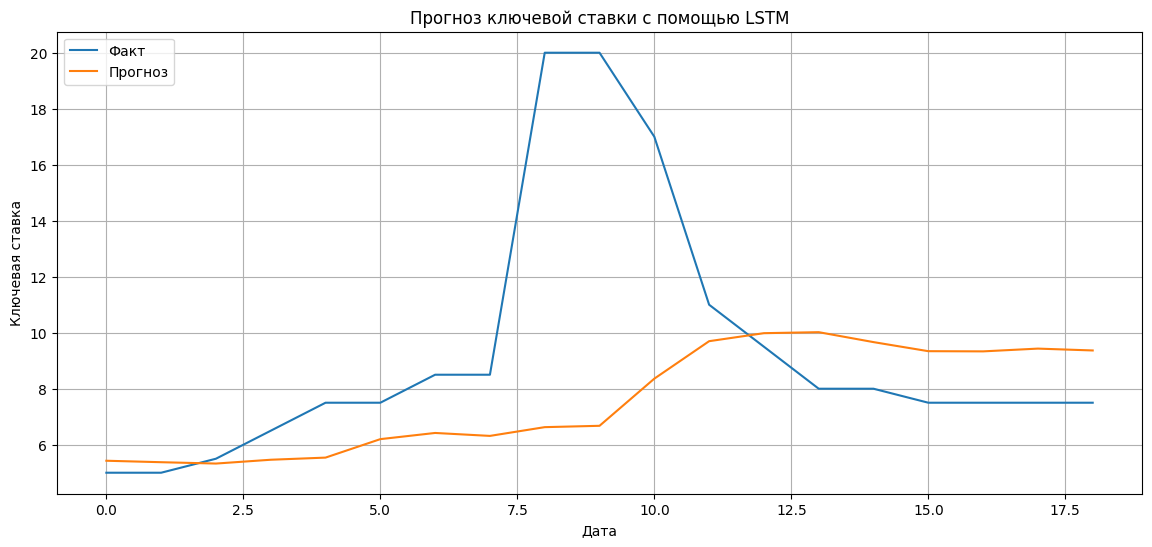

In [228]:
plt.figure(figsize=(14,6))
plt.plot(y_test_original, label='Факт')
plt.plot(y_pred, label='Прогноз')
plt.title('Прогноз ключевой ставки с помощью LSTM')
plt.xlabel('Дата')
plt.ylabel('Ключевая ставка')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

In [236]:
data = data.reset_index(drop=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Дата                              112 non-null    datetime64[ns]
 1   Ключевая ставка, % годовых        112 non-null    float64       
 2   Инфляция, % г/г                   112 non-null    float64       
 3   Денежная масса(М2),млрд руб       112 non-null    float64       
 4   Уровень безработицы по РФ, %      112 non-null    float64       
 5   Курс USD/RUB                      112 non-null    float64       
 6   Объем выданных кредитов, млн руб  112 non-null    int64         
 7   Торговый баланс, млрд $           112 non-null    float64       
 8   Unnamed: 8                        0 non-null      float64       
 9   Unnamed: 9                        0 non-null      float64       
 10  t(X)                              36 non-null     

In [278]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet

# Масштабируем все данные, включая экзогенные переменные и целевую
scaler = StandardScaler()

# Масштабируем обучающие данные
data_scaled = data.copy()
data_scaled[['Ключевая ставка, % годовых', 'Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб']] = scaler.fit_transform(
    data[['Ключевая ставка, % годовых', 'Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб']]
)

# Преобразуем в нужный формат для Prophet
df = data_scaled[['Дата', 'Ключевая ставка, % годовых', 'Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб']]
df.columns = ['ds', 'y', 'inflation', 'usd_to_rub', 'credit_volume']

# Создание модели Prophet
model = Prophet()

# Добавление экзогенных переменных как регрессоры
model.add_regressor('inflation')
model.add_regressor('usd_to_rub')
model.add_regressor('credit_volume')

# Обучение модели
model.fit(df)

# Создание будущих дат для прогнозирования
future = model.make_future_dataframe(periods=24, freq='M', include_history=True)

# Прогнозирование
forecast = model.predict(future)

# Визуализация
model.plot(forecast)
plt.title('Прогноз ключевой ставки с использованием Prophet')
plt.show()

# Визуализация компонентов прогноза
model.plot_components(forecast)
plt.show()

# Масштабируем валидационные данные
valid_data_scaled = valid_data.copy()
valid_data_scaled[['Ключевая ставка, % годовых', 'Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб']] = scaler.transform(
    valid_data[['Ключевая ставка, % годовых', 'Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб']]
)

# Преобразуем валидационные данные в формат Prophet
valid_data_scaled = valid_data_scaled[['Дата', 'Ключевая ставка, % годовых', 'Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб']]
valid_data_scaled.columns = ['ds', 'y', 'inflation', 'usd_to_rub', 'credit_volume']

# Прогнозирование на валидационных данных
forecast_valid = model.predict(valid_data_scaled)

# Оценка прогноза
y_true = valid_data_scaled['y'].values  # Истинные значения
y_pred = forecast_valid['yhat'].values  # Прогнозируемые значения

# Рассчитываем MSE и R^2
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred) * 100  # Преобразуем в проценты

# Вывод результатов
print(f'СКО на валидационных данных: {mse:.2f}')
print(f'R^2 на валидационных данных: {r2:.2f} %')


16:13:26 - cmdstanpy - INFO - Chain [1] start processing
16:13:27 - cmdstanpy - INFO - Chain [1] done processing
c:\Programming\Python\Python developing\python_basics\Вузовские_лабы\myenv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


ValueError: Regressor 'inflation' missing from dataframe

In [272]:
valid_data = pd.read_excel('C:\\Users\\User-Максим\\Desktop\\ВУЗ\\3 курс\\Глинский\\Курсовая\Валидация.xlsx')
valid_data = valid_data.iloc[::-1]
valid_data.head()

,Дата,"Ключевая ставка, % годовых","Инфляция, % г/г","Денежная масса(М2),млрд руб",Курс USD/RUB,"Объем выданных кредитов, млн руб"
21,2.2023,7.5,10.99,84000.0,73.03,1606.116
20,3.2023,7.5,3.51,84800.0,76.08,2060.513
19,4.2023,7.5,2.31,84600.0,80.89,2008.231
18,5.2023,7.5,2.51,86200.0,78.95,2142.526
17,6.2023,7.5,3.25,87300.0,83.16,2202.321


In [273]:
valid_data = valid_data[['Дата', 'Ключевая ставка, % годовых', 'Инфляция, % г/г', 'Курс USD/RUB', 'Объем выданных кредитов, млн руб']]
valid_data.columns = ['ds', 'y', 'inflation', 'usd_to_rub', 'credit_volume']  # Переименовываем столбцы для Prophet

# Убедитесь, что 'ds' в valid_data в формате datetime
valid_data['ds'] = pd.to_datetime(valid_data['ds'])

# Для прогноза на валидационных данных необходимо добавить экзогенные переменные
# Мы будем использовать последние известные значения для будущих периодов (аналогично тому, как делали для future)
last_inflation = valid_data['inflation'].iloc[-1]
last_usd_to_rub = valid_data['usd_to_rub'].iloc[-1]
last_credit_volume = valid_data['credit_volume'].iloc[-1]

# Добавляем экзогенные переменные в valid_data
valid_data['inflation'] = [last_inflation] * len(valid_data)
valid_data['usd_to_rub'] = [last_usd_to_rub] * len(valid_data)
valid_data['credit_volume'] = [last_credit_volume] * len(valid_data)

# Прогноз на валидационных данных
forecast_valid = model.predict(valid_data)

# Оценка прогноза
y_true = valid_data['y'].values  # Истинные значения
y_pred = forecast_valid['yhat'].values  # Прогнозируемые значения

# Рассчитываем MSE и R^2
mse = mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred) * 100  # Преобразуем в проценты

# Вывод результатов
print(f'СКО на валидационных данных: {mse:.2f}')
print(f'R^2 на валидационных данных: {r2:.2f} %')

СКО на валидационных данных: 102.95
R^2 на валидационных данных: -425.10 %
